## EDA Phase: Combined notebook with all our explorations of the data.
Includes initial EDA done on the dataset, including summary statistics, visualizations (bar charts, and boxplots) and general understandings.

In [29]:
# Imports of libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [6]:
BASE_DIR = '../dataset'

In [8]:
# Data loading, the full dataset from Retailrocket has been added to the dataset folder on the main root of the project's codebase.
df_events = pd.read_csv(f'{BASE_DIR}/events.csv')
df_properties = pd.concat([pd.read_csv(f'{BASE_DIR}/item_properties_part1.csv'), pd.read_csv(f'{BASE_DIR}//item_properties_part2.csv')])
df_categories = pd.read_csv(f'{BASE_DIR}/category_tree.csv')

In [49]:
# Display basic information (shape and column details) for key DataFrames 
# to verify their structure and ensure data has been loaded correctly.

print("Inspecting df_events")
print(f"Shape: {df_events.shape}")
print("\nInfo:")
display(df_events.info())

print("\n\nInspecting df_properties")
print(f"Shape: {df_properties.shape}")
print("\nInfo:")
display(df_properties.info())

print("\n\nInspecting df_categories")
print(f"Shape: {df_categories.shape}")
print("\nInfo:")
display(df_categories.info())

Inspecting df_events
Shape: (2755641, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2755641 entries, 0 to 2756100
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  Int64         
 5   timestamp_dt   datetime64[ns]
 6   date           object        
 7   month          period[M]     
dtypes: Int64(1), datetime64[ns](2), int64(2), object(2), period[M](1)
memory usage: 191.8+ MB


None



Inspecting df_properties
Shape: (20275902, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 773.5+ MB


None



Inspecting df_categories
Shape: (1669, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


None

In [50]:
# Analyse quantify the missing data in each table. It's important to identify these gaps early on. 
# The transactionid column in df_events might to have many nulls.

def missing_values_summary(df, df_name):
    """Calculates and prints the missing values count and percentage for a DataFrame."""
    print(f"Missing Values in {df_name}:")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_df = pd.DataFrame({'Count': missing_count, 'Percentage': missing_percentage})
    print(missing_df[missing_df['Count'] > 0])
    print("\n")

missing_values_summary(df_events, 'df_events')
missing_values_summary(df_properties, 'df_properties')
missing_values_summary(df_categories, 'df_categories')

# Calculate and print unique counts from the events data
unique_visitors = df_events['visitorid'].nunique()
unique_items = df_events['itemid'].nunique()
unique_transactions = df_events['transactionid'].nunique()

print("Unique Counts in df_events")
print(f"Number of unique visitors: {unique_visitors:,}")
print(f"Number of unique items involved in events: {unique_items:,}")
print(f"Number of unique transactions: {unique_transactions:,}")

Missing Values in df_events:
                 Count  Percentage
transactionid  2733184   99.185053


Missing Values in df_properties:
Empty DataFrame
Columns: [Count, Percentage]
Index: []


Missing Values in df_categories:
          Count  Percentage
parentid     25    1.497903


Unique Counts in df_events
Number of unique visitors: 1,407,580
Number of unique items involved in events: 235,061
Number of unique transactions: 17,672


#### Statistical EDA 

In [12]:
print("Statistical Summary of df_events")
print(df_events.describe())

print("\n\nEvent Type Distribution")
# value_counts() provides the frequency of each event type
print(df_events['event'].value_counts())

Statistical Summary of df_events
          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000
75%    1.439225e+12  1.053437e+06  3.507150e+05   13224.000000
max    1.442545e+12  1.407579e+06  4.668670e+05   17671.000000


Event Type Distribution
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


In [16]:
# The key columns are property and value, which describe item attributes. 
# According to the dataset description, most of these values are hashed for confidentiality, except for categoryid and available.

print("Statistical Summary of df_properties")
# describe() gives a basic sense of the scale of IDs and timestamps
print(df_properties.describe())

# categorical properties
unique_items_in_properties = df_properties['itemid'].nunique()
unique_properties = df_properties['property'].nunique()

print(f"\nNumber of unique items with properties: {unique_items_in_properties:,}")
print(f"Number of unique property types: {unique_properties:,}")

print("\n\nTop 10 Most Common Item Properties")
top_10_properties = df_properties['property'].value_counts().head(10)
print(top_10_properties)

Statistical Summary of df_properties
          timestamp        itemid
count  2.027590e+07  2.027590e+07
mean   1.435157e+12  2.333904e+05
std    3.327798e+09  1.348452e+05
min    1.431227e+12  0.000000e+00
25%    1.432436e+12  1.165160e+05
50%    1.433646e+12  2.334830e+05
75%    1.437880e+12  3.503040e+05
max    1.442113e+12  4.668660e+05

Number of unique items with properties: 417,053
Number of unique property types: 1,104


Top 10 Most Common Item Properties
property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
283            597419
776            574220
678            481966
364            476486
202            448938
Name: count, dtype: int64


In [18]:
# df_categories stats EDA
# This DataFrame defines the hierarchy of product categories. 

print("Statistical Summary of df_categories")
print(df_categories.describe())

# Analyzing the category hierarchy
total_categories = df_categories['categoryid'].nunique()
total_parent_categories = df_categories['parentid'].nunique()

# Root categories are those with no parentid
root_categories_count = df_categories['parentid'].isnull().sum()

print(f"\nTotal unique categories: {total_categories:,}")
print(f"Total unique parent categories: {total_parent_categories:,}")
print(f"Number of root categories (no parent): {root_categories_count}")

# Let's find the top 10 largest parent categories (i.e., parents with the most children)
print("\n\nTop 10 Parent Categories by Child Count")
top_10_parents = df_categories['parentid'].value_counts().head(10)
print(top_10_parents)

Statistical Summary of df_categories
        categoryid     parentid
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000

Total unique categories: 1,669
Total unique parent categories: 362
Number of root categories (no parent): 25


Top 10 Parent Categories by Child Count
parentid
250.0     31
1009.0    22
362.0     22
351.0     19
1259.0    18
1687.0    17
945.0     15
312.0     15
92.0      13
1482.0    13
Name: count, dtype: int64


#### Visualizations

C:\Users\Admin\AppData\Local\Temp\ipykernel_11468\1742471685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='event', data=df_events, order=df_events['event'].value_counts().index, palette='viridis')


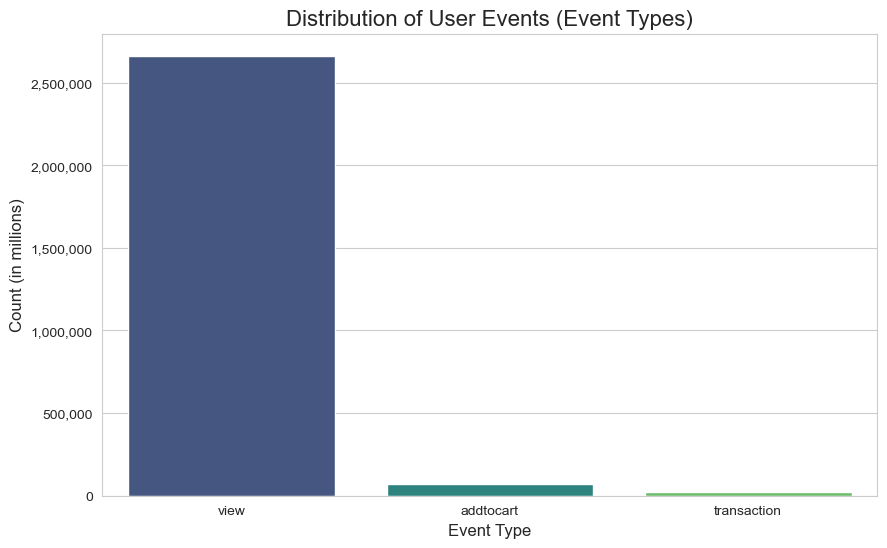

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='event', data=df_events, order=df_events['event'].value_counts().index, palette='viridis')

ax.set_title('Distribution of User Events (Event Types)', fontsize=16)
ax.set_xlabel('Event Type', fontsize=12)
ax.set_ylabel('Count (in millions)', fontsize=12)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11468\3147525647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=events_per_visitor, palette='coolwarm')


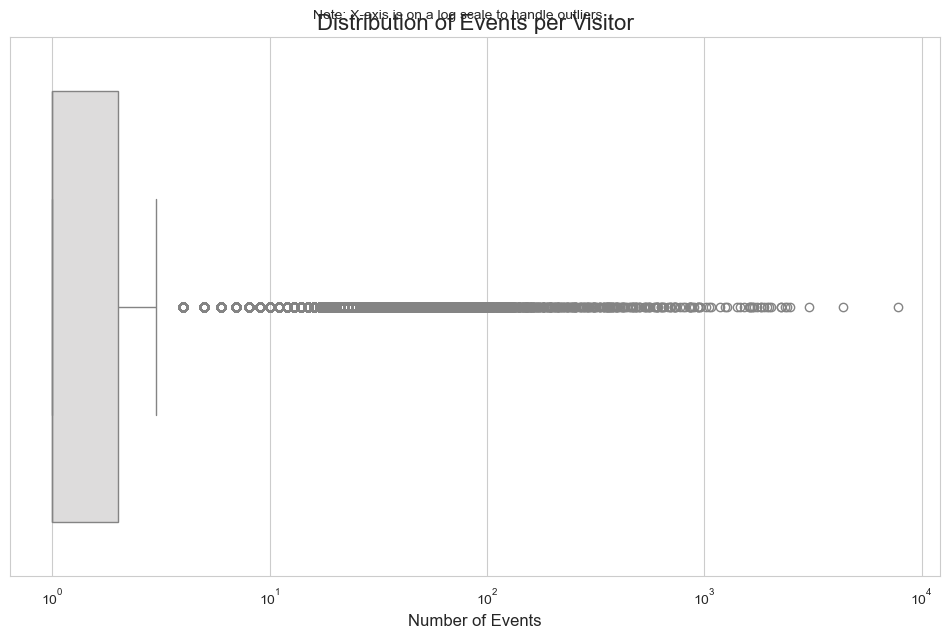

Statistics for Events Per Visitor
count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
Name: event, dtype: float64


In [21]:
events_per_visitor = df_events.groupby('visitorid')['event'].count()

plt.figure(figsize=(12, 7))

sns.boxplot(x=events_per_visitor, palette='coolwarm')

plt.title('Distribution of Events per Visitor', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.xscale('log') # Use a log scale due to the high skewness of the data
plt.suptitle('Note: X-axis is on a log scale to handle outliers \n', y=0.92, fontsize=10)

plt.show()
print("Statistics for Events Per Visitor")
print(events_per_visitor.describe())

C:\Users\Admin\AppData\Local\Temp\ipykernel_11468\3677867401.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event', y='duration', data=session_events, palette='Set2')


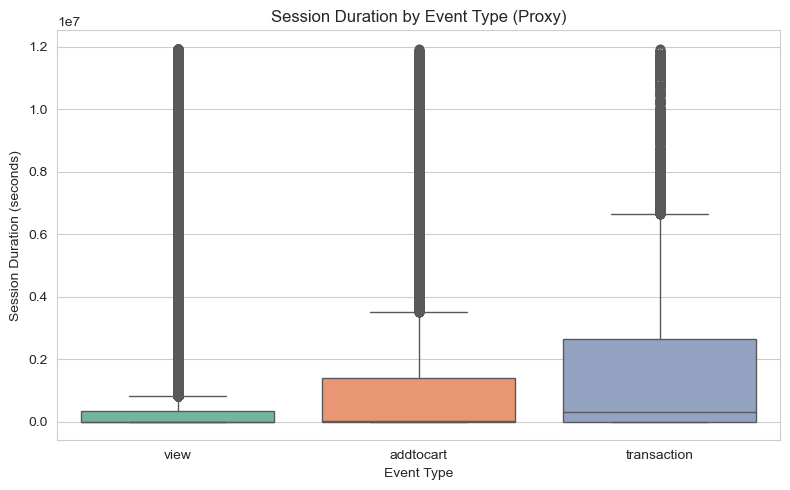

In [22]:
if 'session_id' in df_events.columns and 'duration' in df_events.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='event', y='duration', data=df_events, palette='Set2')
    plt.title('Session Duration by Event Type')
    plt.xlabel('Event Type')
    plt.ylabel('Session Duration (seconds)')
    plt.tight_layout()
    plt.show()
else:
    if pd.api.types.is_integer_dtype(df_events['timestamp']):
        df_events['timestamp_dt'] = pd.to_datetime(df_events['timestamp'], unit='ms')
    else:
        df_events['timestamp_dt'] = pd.to_datetime(df_events['timestamp'])
    session_spread = df_events.groupby('visitorid')['timestamp_dt'].agg(['min', 'max'])
    session_spread['duration'] = (session_spread['max'] - session_spread['min']).dt.total_seconds()
    session_events = df_events.merge(session_spread['duration'], left_on='visitorid', right_index=True)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='event', y='duration', data=session_events, palette='Set2')
    plt.title('Session Duration by Event Type (Proxy)')
    plt.xlabel('Event Type')
    plt.ylabel('Session Duration (seconds)')
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11468\874292892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index.astype(str), y=top_items.values, palette='Blues')


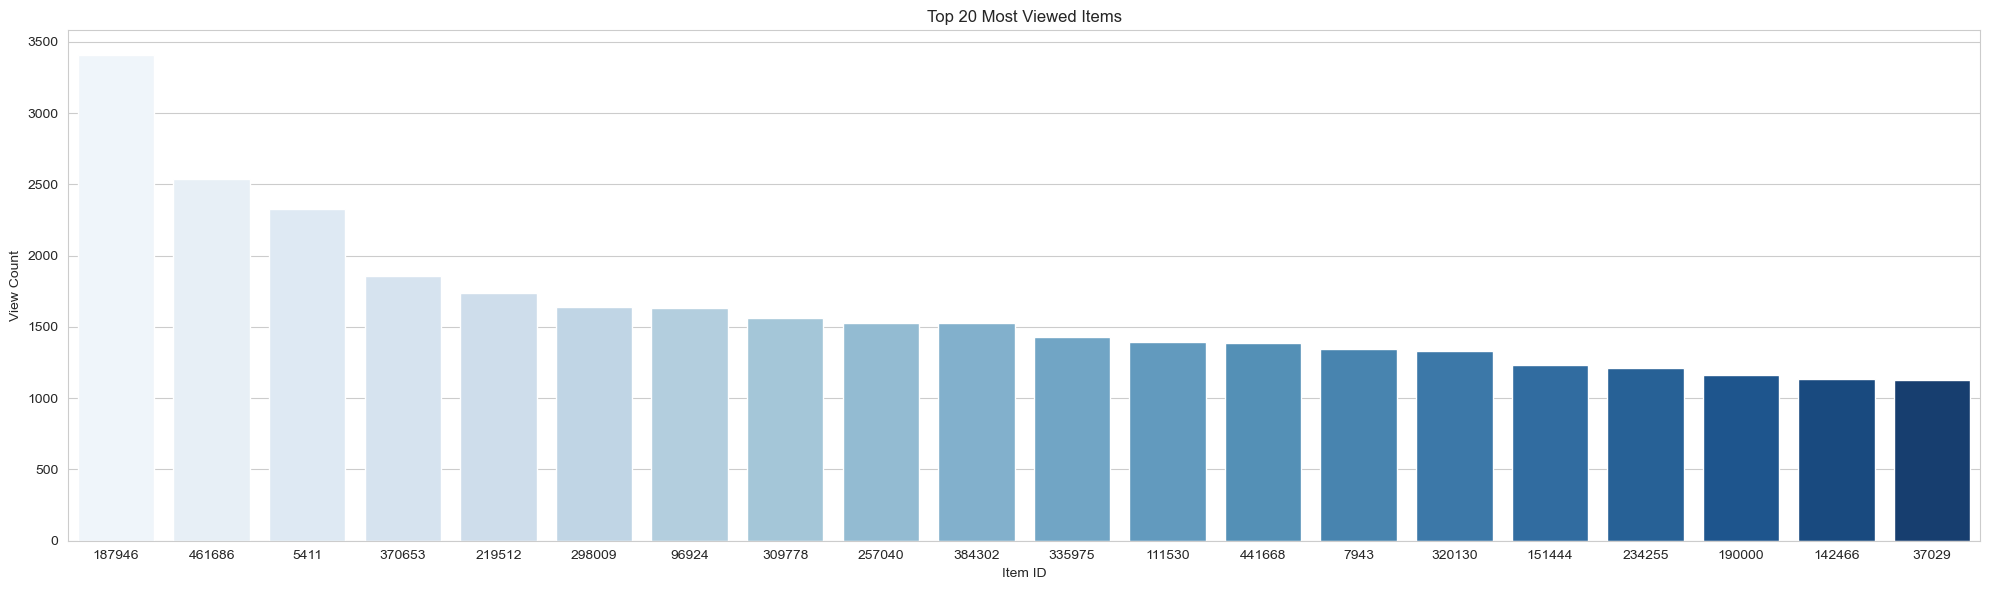

In [23]:
top_items = df_events[df_events['event'] == 'view']['itemid'].value_counts().head(20)
plt.figure(figsize=(20, 6))
sns.barplot(x=top_items.index.astype(str), y=top_items.values, palette='Blues')
plt.title('Top 20 Most Viewed Items')
plt.xlabel('Item ID')
plt.ylabel('View Count')
plt.tight_layout()
plt.show()

## Insights

Initial understandings of the findings and what we can use for the project

1. Overall data health, Clean:

- The dataset is large and clean. We're working with over 2.7 million user events and 20 million item properties, and it all loaded correctly.
- Missing values are as expected. The transactionid column is about 99% empty, which is perfectly normal since it only populates for the 22,457 'transaction' events. The other files are in great shape with no critical missing data.

2. Main User Behavior Insights:

- The Classic E-commerce flow is clear. Most of the activy or events just users browsing. There is a huge drop-off from 2.6 million 'views' down to just ~69,000 'addtocart' events and ~22,000 'transactions' events. So it confirms that purchasing is a rare event compared to viewing or passively adding items to carts.

- We can kind of already groups the users as "Casual Browsers" or "Highly Engaged Visitors"

- "Casual" represents the low interaction count (many users have only one event), and "Browsers" highlights that their primary action is 'viewing' or just 'addtocart' items without deeper engagement.

- "Highly Engaged" directly refers to the large number of events these users generate. I used the "Visitors" word cause it's a neutral way to describe them, their high activity could involve extensive browsing, adding many items to the cart, or making purchases (We can then try to analyze this further when we do the clusterings)

    - The data contains over 1.4 million unique visitors.   
    - But the statistics EDA show that only about 50% of users perform only a single action and then leave.
    - On the extreme end, we have highly engaged users, with one visitor performing over 7,700 events. This heavy skew proves that clear behavioral segments exist, which is exactly what we want to find or we can aim to present.

- Buyer Sessions look a bit different. The second boxplot suggests that sessions containing a 'transaction' event tend to have a longer duration. This could be a hint that session duration will be a powerful feature for our clustering model to separate buyers from browsers for example.

3. Product & Category Context

- There's rich metadata to work with. We have properties for over 417,000 unique items. The categoryid and available properties are clearly identifiable and will be very useful.

- There is also a clear popularity that exists: The bar chart of the "Top 20 Most Viewed Items" shows that a few products get a massive amount of attention, while most others get very little.

- We can analyze also behavior at the category level. The category_tree.csv file / df_categories data frame shows a clear hierarchy with 25 main "root" categories. This is great because it means we don't have to limit our association rule mining to just individual items; we can find patterns like "users who buy from Category A also tend to view items in Category B."

## Types and Features

The datasets use a combination of integer, float, and object data types, each specific to its file. In events.csv, timestamp, visitorid, and itemid are int64, transactionid is float64 to allow for missing values, and event is an object representing categorical interaction types. In item_properties.csv, timestamp and itemid are int64, while property and value are object types, storing categorical or hashed text and numerical values. In category_tree.csv, categoryid is int64, and parentid is float64 to accommodate missing entries in the hierarchy. This combination of data types enables the datasets to capture numerical, categorical, and temporal information across user behaviour, item attributes, and category structure.

## Line grapgh and bubble graph

Line Graphs: detect peak activity days, monthly trends, and visitor engagement.

Bubble Charts: identify popular items, high-converting items, price sensitivity, and category-level popularity.

In [24]:
sns.set(style="whitegrid")

df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='ms')

df_events['date'] = df_events['timestamp'].dt.date
df_events['month'] = df_events['timestamp'].dt.to_period('M')

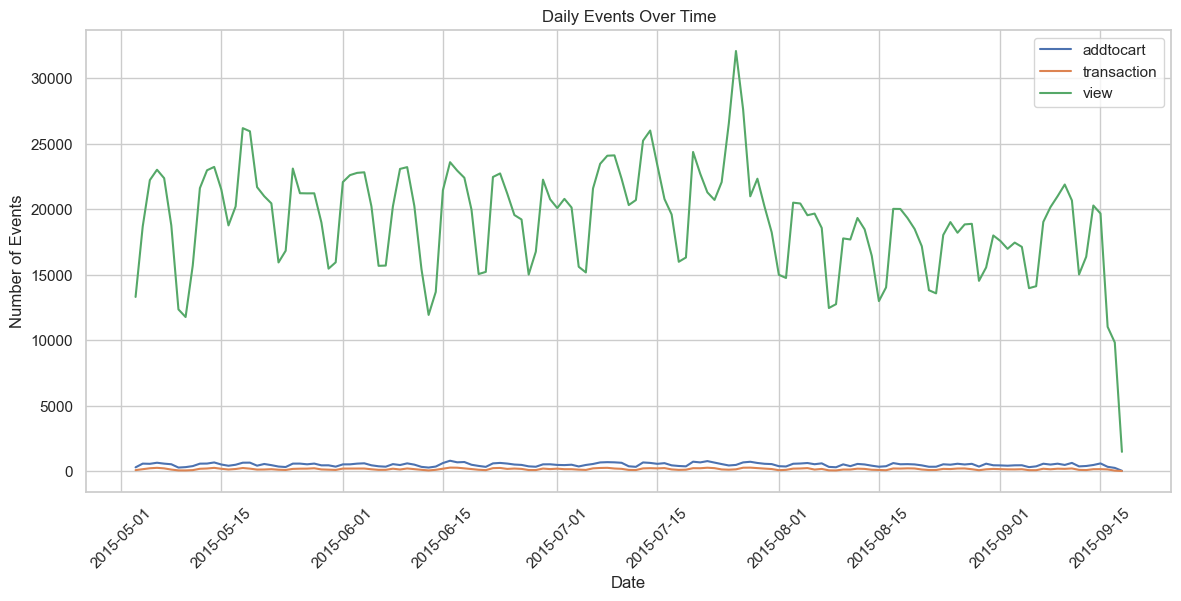

In [25]:
daily_events = df_events.groupby(['date','event']).size().unstack(fill_value=0)

plt.figure(figsize=(14,6))
for event_type in daily_events.columns:
    plt.plot(daily_events.index, daily_events[event_type], label=event_type)
plt.title("Daily Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.legend()
plt.xticks(rotation=45)
plt.show()

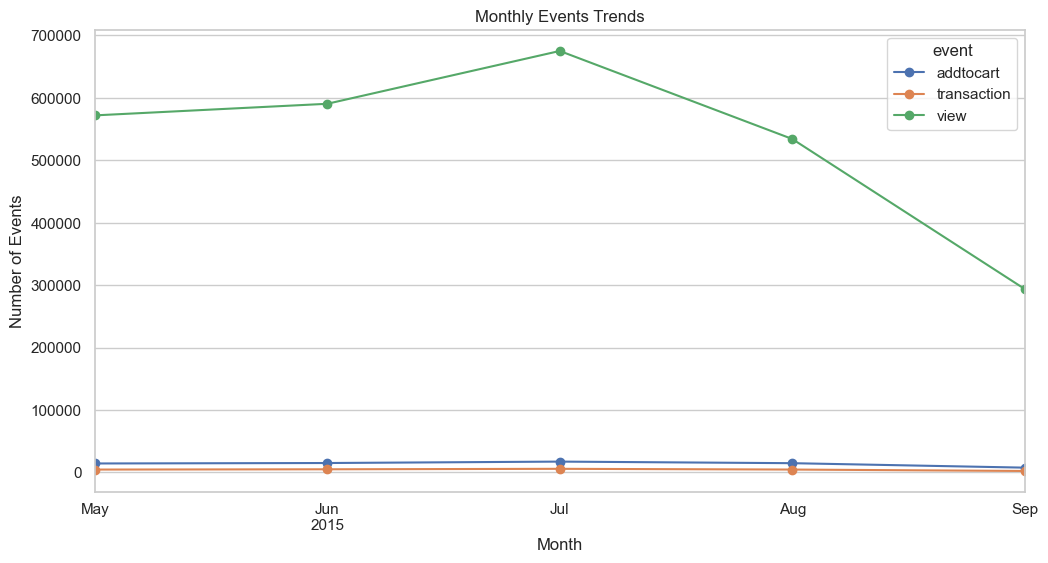

In [26]:
monthly_events = df_events.groupby(['month','event']).size().unstack(fill_value=0)

monthly_events.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Events Trends")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

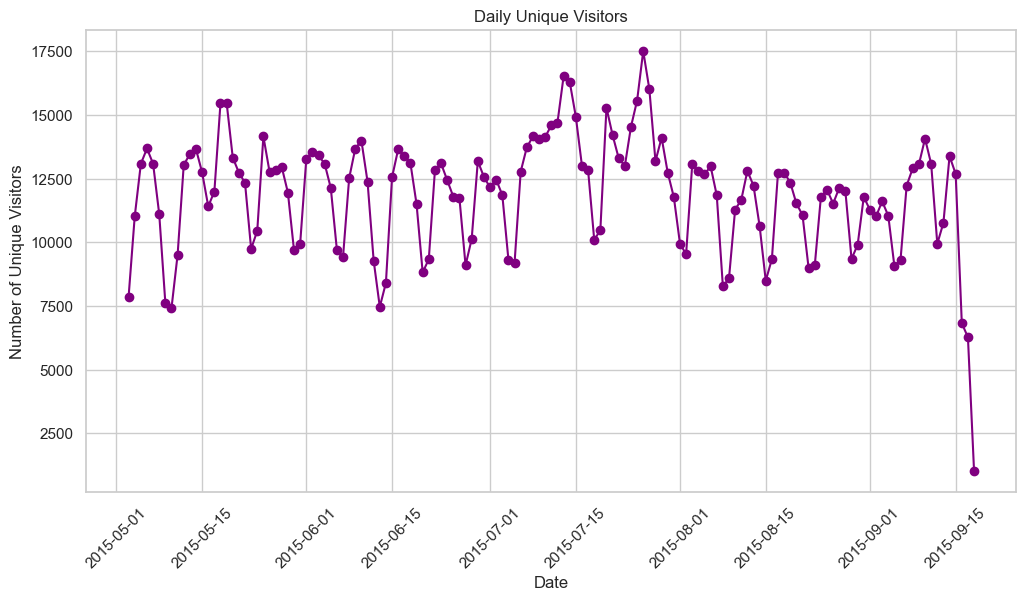

In [27]:
daily_visitors = df_events.groupby('date')['visitorid'].nunique()
plt.figure(figsize=(12,6))
plt.plot(daily_visitors.index, daily_visitors.values, color='purple', marker='o')
plt.title("Daily Unique Visitors")
plt.xlabel("Date")
plt.ylabel("Number of Unique Visitors")
plt.xticks(rotation=45)
plt.show()

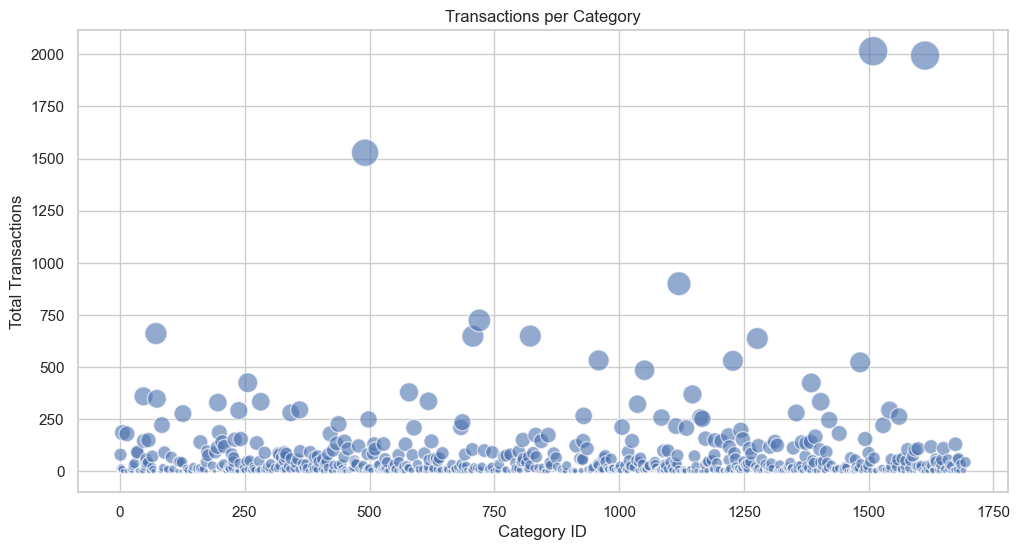

In [30]:
category_data = df_properties[df_properties['property']=='categoryid'][['itemid','value']].copy()
category_data['categoryid'] = category_data['value'].astype(int)

item_transactions = df_events[df_events['event']=='transaction'].groupby('itemid').size().reset_index(name='num_transactions')

cat_trans = pd.merge(item_transactions, category_data, on='itemid', how='inner')

cat_summary = cat_trans.groupby('categoryid')['num_transactions'].sum().reset_index()

bubble_sizes = np.sqrt(cat_summary['num_transactions']) * 10

plt.figure(figsize=(12,6))
plt.scatter(
    cat_summary['categoryid'],
    cat_summary['num_transactions'],
    s=bubble_sizes,
    alpha=0.6,
    edgecolors='w'
)
plt.xlabel("Category ID")
plt.ylabel("Total Transactions")
plt.title("Transactions per Category")
plt.show()

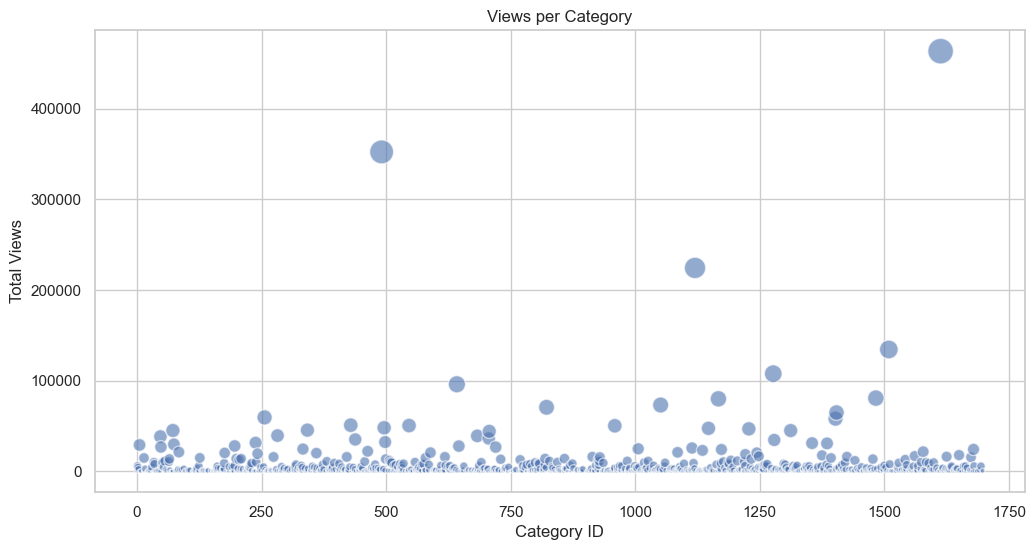

In [31]:
item_views = df_events[df_events['event']=='view'].groupby('itemid').size().reset_index(name='num_views')

# Merge with category
cat_views = pd.merge(item_views, category_data, on='itemid', how='inner')

# Aggregate views per category
cat_views_summary = cat_views.groupby('categoryid')['num_views'].sum().reset_index()
bubble_sizes = np.sqrt(cat_views_summary['num_views']) * 0.5

plt.figure(figsize=(12,6))
plt.scatter(
    cat_views_summary['categoryid'],
    cat_views_summary['num_views'],
    s=bubble_sizes,
    alpha=0.6,
    edgecolors='w'
)
plt.xlabel("Category ID")
plt.ylabel("Total Views")
plt.title("Views per Category")
plt.show()


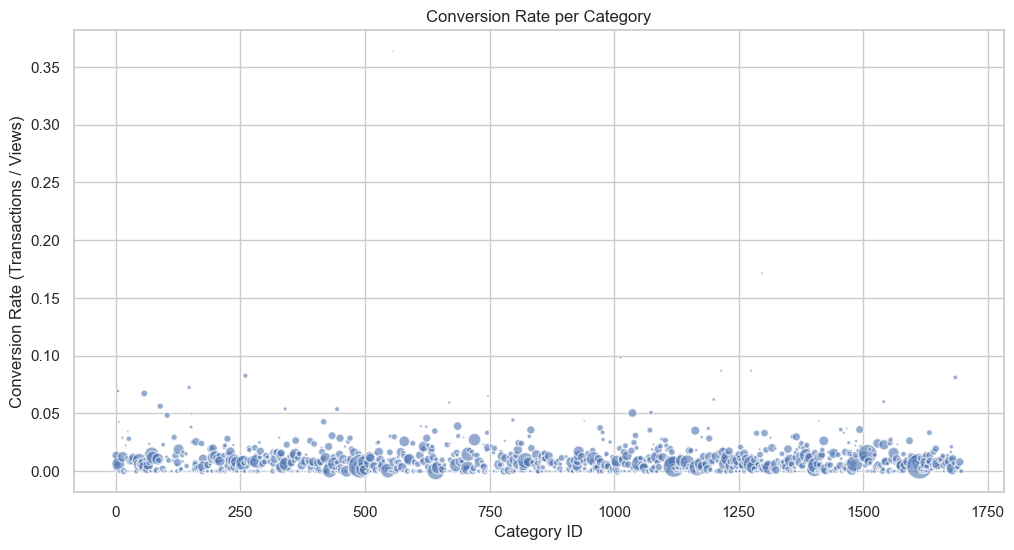

In [33]:
# Merge transactions and views per item
item_conv = pd.merge(item_views, item_transactions, on='itemid', how='left').fillna(0)
item_conv = pd.merge(item_conv, category_data, on='itemid', how='inner')

cat_conv = item_conv.groupby('categoryid').agg({'num_views':'sum','num_transactions':'sum'}).reset_index()
cat_conv['conversion_rate'] = cat_conv['num_transactions'] / cat_conv['num_views']

bubble_sizes = np.sqrt(cat_conv['num_views']) * 0.5

plt.figure(figsize=(12,6))
plt.scatter(
    cat_conv['categoryid'],
    cat_conv['conversion_rate'],
    s=bubble_sizes,
    alpha=0.6,
    edgecolors='w'
)
plt.xlabel("Category ID")
plt.ylabel("Conversion Rate (Transactions / Views)")
plt.title("Conversion Rate per Category")
plt.show()


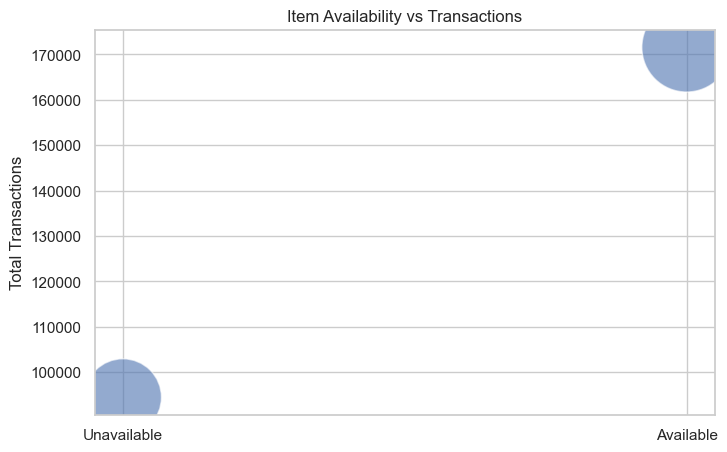

In [34]:
availability = df_properties[df_properties['property']=='available'][['itemid','value']].copy()
availability['available'] = availability['value'].astype(int)
avail_trans = pd.merge(item_transactions, availability, on='itemid', how='inner')

avail_summary = avail_trans.groupby('available')['num_transactions'].sum().reset_index()
bubble_sizes = np.sqrt(avail_summary['num_transactions'])*10

plt.figure(figsize=(8,5))
plt.scatter(
    avail_summary['available'],
    avail_summary['num_transactions'],
    s=bubble_sizes,
    alpha=0.6,
    edgecolors='w'
)
plt.xticks([0,1],['Unavailable','Available'])
plt.ylabel("Total Transactions")
plt.title("Item Availability vs Transactions")
plt.show()


In [36]:

def missing_values_summary(df, df_name):
    """Calculates and prints the missing values count and percentage for a DataFrame."""
    print(f"Missing Values in {df_name}")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_df = pd.DataFrame({'Count': missing_count, 'Percentage': missing_percentage})
    print(missing_df[missing_df['Count'] > 0])
    print("\n")

missing_values_summary(df_events, 'df_events')
missing_values_summary(df_properties, 'df_properties')
missing_values_summary(df_categories, 'df_categories')

unique_visitors = df_events['visitorid'].nunique()
unique_items = df_events['itemid'].nunique()
unique_transactions = df_events['transactionid'].nunique()

print("Unique Counts in df_events")
print(f"Number of unique visitors: {unique_visitors:,}")
print(f"Number of unique items involved in events: {unique_items:,}")
print(f"Number of unique transactions: {unique_transactions:,}")

Missing Values in df_events
                 Count  Percentage
transactionid  2733644    99.18519


Missing Values in df_properties
Empty DataFrame
Columns: [Count, Percentage]
Index: []


Missing Values in df_categories
          Count  Percentage
parentid     25    1.497903


Unique Counts in df_events
Number of unique visitors: 1,407,580
Number of unique items involved in events: 235,061
Number of unique transactions: 17,672


In [40]:
rare_visitors = df_events['visitorid'].value_counts()
rare_visitors = rare_visitors[rare_visitors == 1].index

df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='s', errors='coerce')
print(df_events['timestamp'].min(), df_events['timestamp'].max())

df_properties['property'] = df_properties['property'].str.lower().str.strip()

df_properties['property'].value_counts().head(20)

2015-05-03 03:00:04.384000 2015-09-18 02:59:47.788000


property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
283            597419
776            574220
678            481966
364            476486
202            448938
839            417239
917            417227
764            417053
159            417053
112            417053
227            347492
698            289849
451            264416
663            240813
962            239372
Name: count, dtype: int64

In [41]:
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='s', errors='coerce')
df_events['visitorid'] = df_events['visitorid'].astype('int64')
df_events['itemid'] = df_events['itemid'].astype('int64')
df_events['event'] = df_events['event'].astype('category')

df_events['transactionid'] = df_events['transactionid'].astype('Int64')

df_events = df_events[df_events['event'].notna()]
df_events['event'] = df_events['event'].str.lower().str.strip()

df_events = df_events.drop_duplicates()
print(df_events.dtypes)
print(df_events.head())

timestamp        datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid             Int64
timestamp_dt     datetime64[ns]
date                     object
month                 period[M]
dtype: object
                timestamp  visitorid event  itemid  transactionid  \
0 2015-06-02 05:02:12.117     257597  view  355908           <NA>   
1 2015-06-02 05:50:14.164     992329  view  248676           <NA>   
2 2015-06-02 05:13:19.827     111016  view  318965           <NA>   
3 2015-06-02 05:12:35.914     483717  view  253185           <NA>   
4 2015-06-02 05:02:17.106     951259  view  367447           <NA>   

             timestamp_dt        date    month  
0 2015-06-02 05:02:12.117  2015-06-02  2015-06  
1 2015-06-02 05:50:14.164  2015-06-02  2015-06  
2 2015-06-02 05:13:19.827  2015-06-02  2015-06  
3 2015-06-02 05:12:35.914  2015-06-02  2015-06  
4 2015-06-02 05:02:17.106  2015-06-02  2015-06  


In [42]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

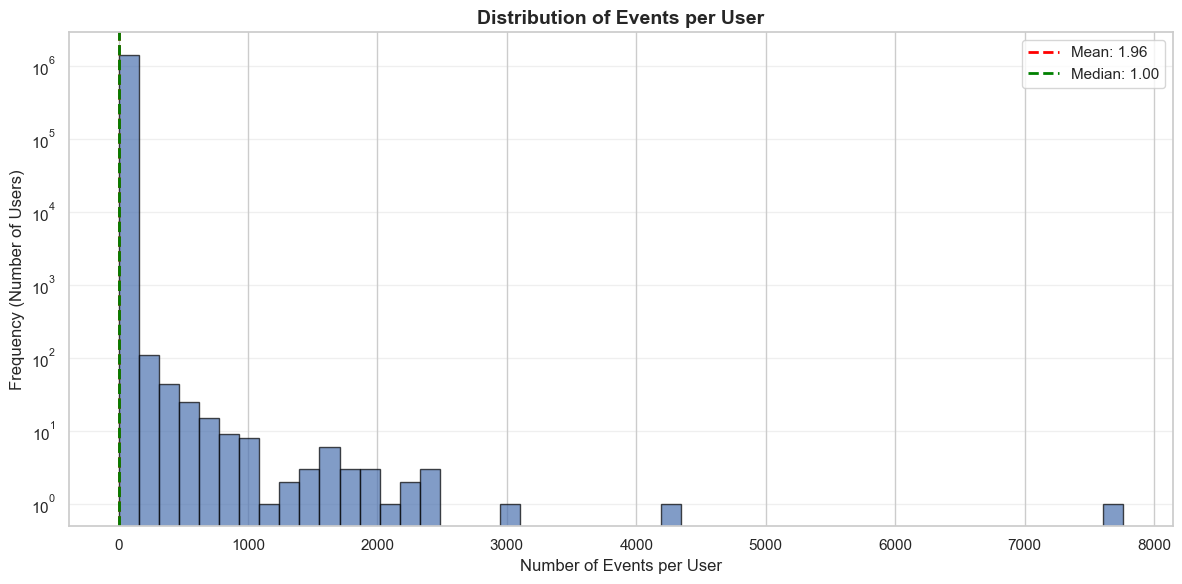


Events per User Statistics:
Total unique users: 1,407,580
Mean events per user: 1.96
Median events per user: 1.00
Min events: 1
Max events: 7757
Std deviation: 12.58


In [43]:
events_per_user = df_events.groupby('visitorid').size().reset_index(name='event_count')

plt.figure(figsize=(12, 6))
plt.hist(events_per_user['event_count'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Events per User', fontsize=12)
plt.ylabel('Frequency (Number of Users)', fontsize=12)
plt.title('Distribution of Events per User', fontsize=14, fontweight='bold')
plt.yscale('log')  # Using log scale as distribution is likely very skewed
plt.grid(axis='y', alpha=0.3)

mean_events = events_per_user['event_count'].mean()
median_events = events_per_user['event_count'].median()
plt.axvline(mean_events, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_events:.2f}')
plt.axvline(median_events, color='green', linestyle='--', linewidth=2, label=f'Median: {median_events:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print("\nEvents per User Statistics:")
print(f"Total unique users: {events_per_user.shape[0]:,}")
print(f"Mean events per user: {mean_events:.2f}")
print(f"Median events per user: {median_events:.2f}")
print(f"Min events: {events_per_user['event_count'].min()}")
print(f"Max events: {events_per_user['event_count'].max()}")
print(f"Std deviation: {events_per_user['event_count'].std():.2f}")

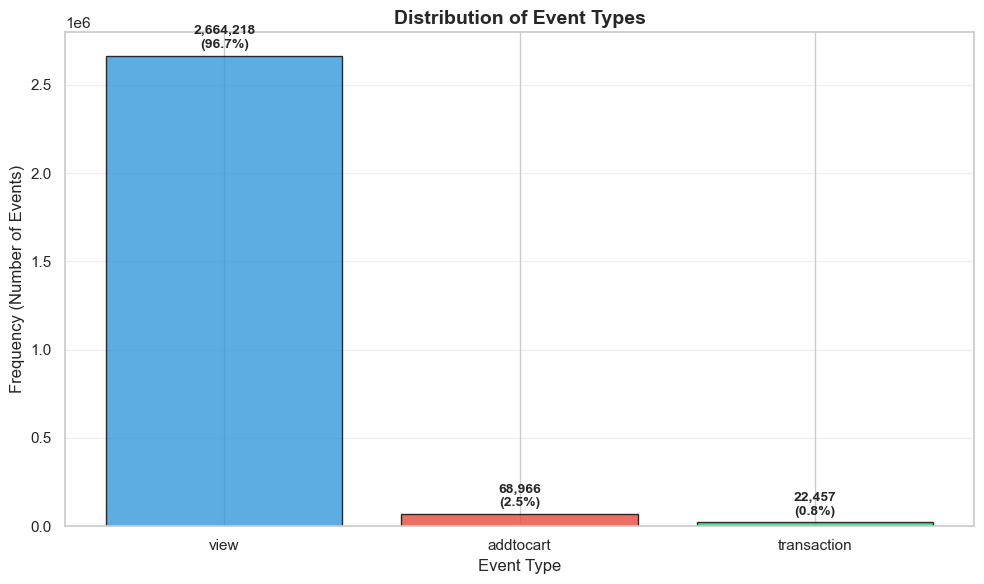


Event Type Distribution:
view: 2,664,218 (96.68%)
addtocart: 68,966 (2.50%)
transaction: 22,457 (0.81%)


In [44]:
event_type_counts = df_events['event'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = plt.bar(range(len(event_type_counts)), event_type_counts.values, 
               color=colors[:len(event_type_counts)], edgecolor='black', alpha=0.8)

plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Frequency (Number of Events)', fontsize=12)
plt.title('Distribution of Event Types', fontsize=14, fontweight='bold')
plt.xticks(range(len(event_type_counts)), event_type_counts.index, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, event_type_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(event_type_counts)*0.01, 
             f'{value:,}\n({value/len(df_events)*100:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nEvent Type Distribution:")
for event_type, count in event_type_counts.items():
    percentage = (count / len(df_events)) * 100
    print(f"{event_type}: {count:,} ({percentage:.2f}%)")


Event types in dataset:
event
view           2664218
addtocart        68966
transaction      22457
Name: count, dtype: int64


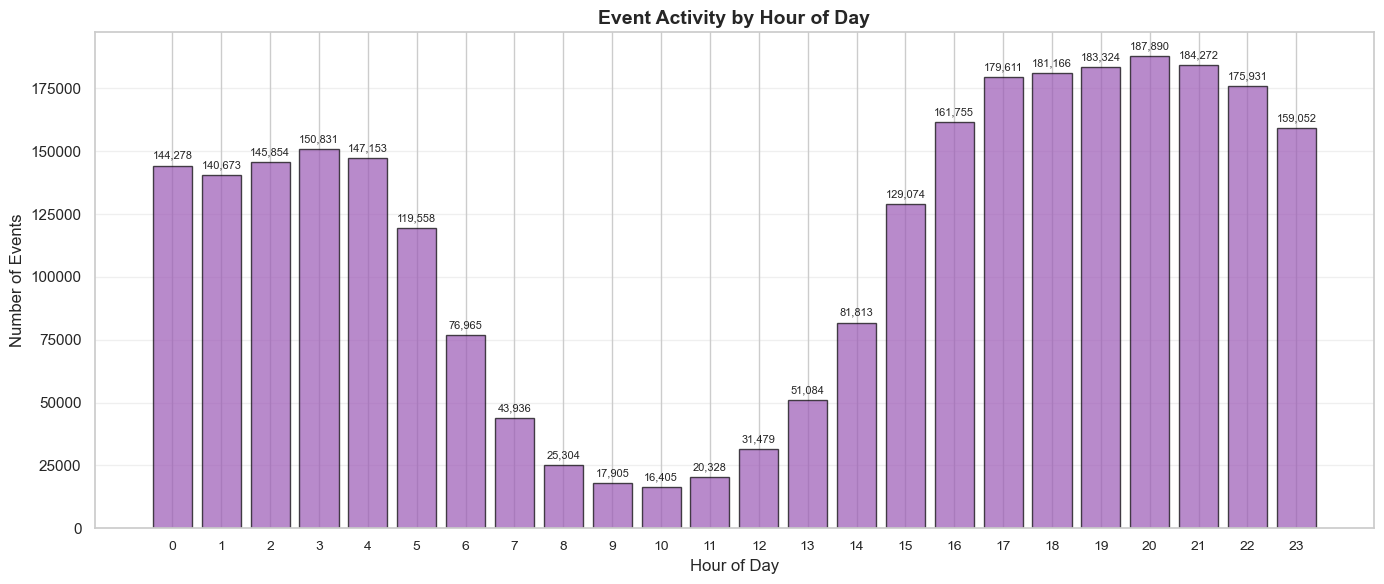

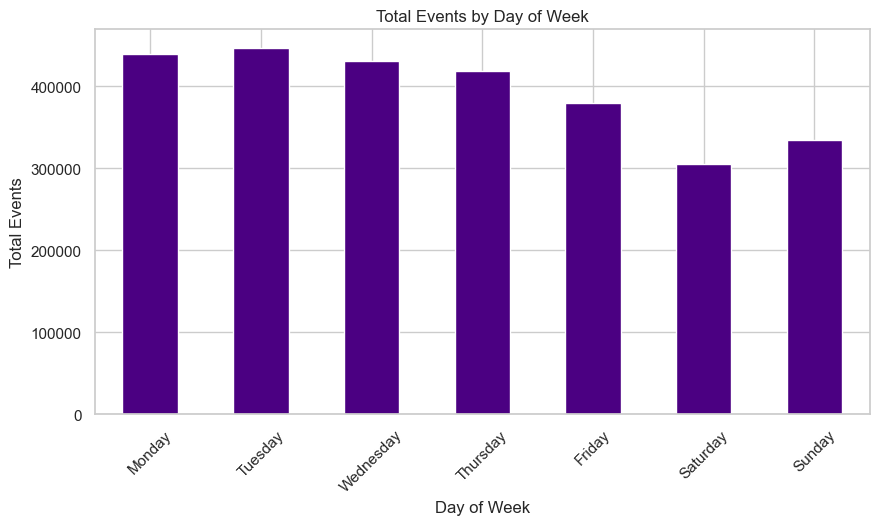


Hourly Activity Statistics:
Peak hour: 20:00
Peak hour events: 187,890
Lowest hour: 10:00
Lowest hour events: 16,405
Average events per hour: 114818.38


In [52]:
# HOUR-OF-DAY ACTIVITY - Understanding temporal browsing patterns

df_events['datetime'] = pd.to_datetime(df_events['timestamp'], unit='ms')
df_events['hour'] = df_events['datetime'].dt.hour

print("\nEvent types in dataset:")
print(df_events['event'].value_counts())

hourly_activity = df_events.groupby('hour').size().reset_index(name='event_count')

# Temporal Features
df_events['date'] = df_events['timestamp'].dt.date
df_events['dayofweek'] = df_events['timestamp'].dt.day_name()
df_events['hour'] = df_events['timestamp'].dt.hour

plt.figure(figsize=(14, 6))
plt.bar(hourly_activity['hour'], hourly_activity['event_count'], 
        edgecolor='black', alpha=0.7, color='#9b59b6')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Event Activity by Hour of Day', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24), fontsize=10)
plt.grid(axis='y', alpha=0.3)

for i, row in hourly_activity.iterrows():
    plt.text(row['hour'], row['event_count'] + max(hourly_activity['event_count'])*0.01, 
             f"{row['event_count']:,}", 
             ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
day_counts = df_events.groupby('dayofweek')['event'].count().reindex(day_order)
day_counts.plot(kind='bar', color='indigo')
plt.title('Total Events by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Events')
plt.xticks(rotation=45)
plt.show()

print("\nHourly Activity Statistics:")
print(f"Peak hour: {hourly_activity.loc[hourly_activity['event_count'].idxmax(), 'hour']}:00")
print(f"Peak hour events: {hourly_activity['event_count'].max():,}")
print(f"Lowest hour: {hourly_activity.loc[hourly_activity['event_count'].idxmin(), 'hour']}:00")
print(f"Lowest hour events: {hourly_activity['event_count'].min():,}")
print(f"Average events per hour: {hourly_activity['event_count'].mean():.2f}")

<Figure size 1400x600 with 0 Axes>

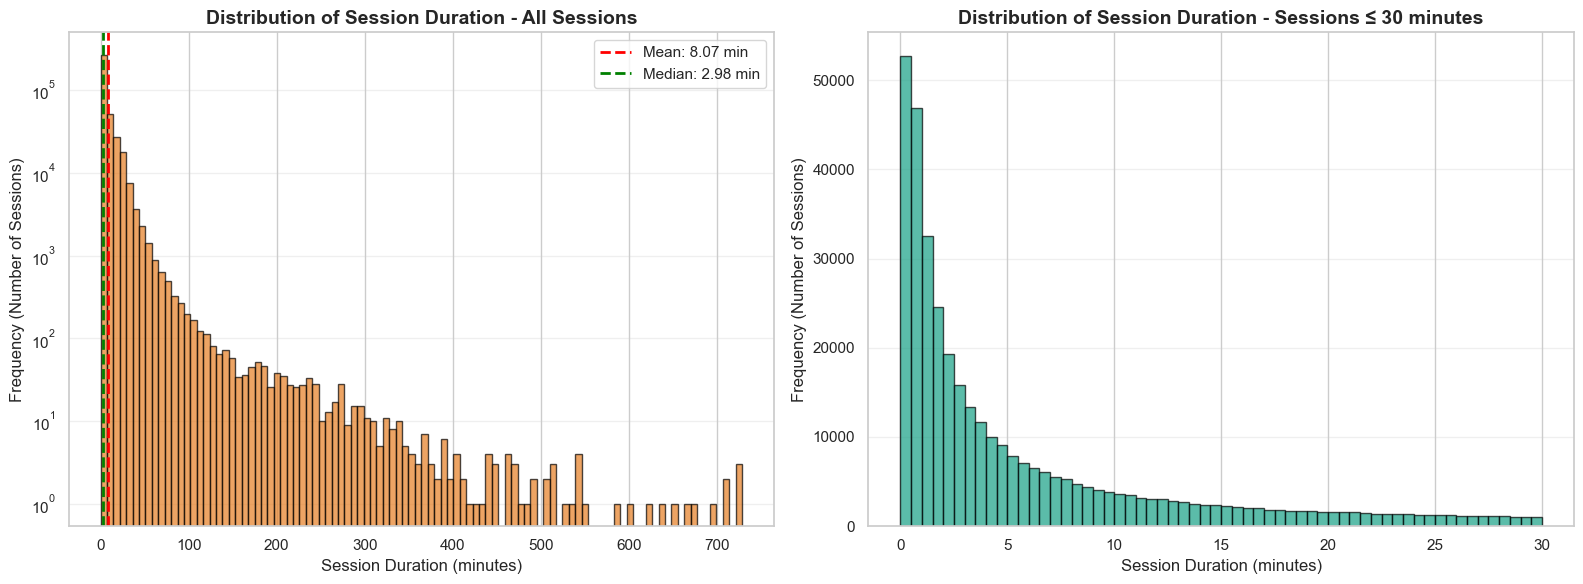


Session Duration Statistics:
Total sessions: 1,761,675
Multi-event sessions: 382,712
Single-event sessions: 1,378,963

For multi-event sessions:
Mean duration: 8.07 minutes
Median duration: 2.98 minutes
Min duration: 0.00 minutes
Max duration: 728.40 minutes
Std deviation: 16.37 minutes

Percentiles:
25th percentile: 0.95 minutes
50th percentile: 2.98 minutes
75th percentile: 9.41 minutes
90th percentile: 21.43 minutes
95th percentile: 29.14 minutes


In [65]:
# DEFINE SESSIONS
events_sorted = df_events.sort_values(['visitorid', 'timestamp'])

# Calculate time difference between consecutive events for each user
events_sorted['time_diff'] = events_sorted.groupby('visitorid')['timestamp'].diff()

# Define session breaks and create session IDs
SESSION_THRESHOLD = pd.to_timedelta('30 minutes')
events_sorted['new_session'] = (events_sorted['time_diff'] > SESSION_THRESHOLD) | (events_sorted['time_diff'].isna())
events_sorted['session_id'] = events_sorted.groupby('visitorid')['new_session'].cumsum()
events_sorted['unique_session_id'] = events_sorted['visitorid'].astype(str) + '_' + events_sorted['session_id'].astype(str)

session_stats = events_sorted.groupby('unique_session_id').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    event_count=('timestamp', 'count')
).reset_index()

session_stats['duration'] = session_stats['end_time'] - session_stats['start_time']
session_stats['duration_minutes'] = session_stats['duration'].dt.total_seconds() / 60
session_stats_multi = session_stats[session_stats['event_count'] > 1].copy()

plt.figure(figsize=(14, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(session_stats_multi['duration_minutes'], bins=100, edgecolor='black', alpha=0.7, color='#e67e22')
ax1.set_xlabel('Session Duration (minutes)', fontsize=12)
ax1.set_ylabel('Frequency (Number of Sessions)', fontsize=12)
ax1.set_title('Distribution of Session Duration - All Sessions', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.3)

mean_duration = session_stats_multi['duration_minutes'].mean()
median_duration = session_stats_multi['duration_minutes'].median()
ax1.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.2f} min')
ax1.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.2f} min')
ax1.legend()

session_stats_short = session_stats_multi[session_stats_multi['duration_minutes'] <= 30]

ax2.hist(session_stats_short['duration_minutes'], bins=60, edgecolor='black', alpha=0.7, color='#16a085')
ax2.set_xlabel('Session Duration (minutes)', fontsize=12)
ax2.set_ylabel('Frequency (Number of Sessions)', fontsize=12)
ax2.set_title('Distribution of Session Duration - Sessions ≤ 30 minutes', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSession Duration Statistics:")
print(f"Total sessions: {len(session_stats):,}")
print(f"Multi-event sessions: {len(session_stats_multi):,}")
print(f"Single-event sessions: {len(session_stats) - len(session_stats_multi):,}")

print(f"\nFor multi-event sessions:")
print(f"Mean duration: {mean_duration:.2f} minutes")
print(f"Median duration: {median_duration:.2f} minutes")

duration_stats = session_stats_multi['duration_minutes']
print(f"Min duration: {duration_stats.min():.2f} minutes")
print(f"Max duration: {duration_stats.max():.2f} minutes")
print(f"Std deviation: {duration_stats.std():.2f} minutes")
print(f"\nPercentiles:")
print(f"25th percentile: {duration_stats.quantile(0.25):.2f} minutes")
print(f"50th percentile: {duration_stats.quantile(0.50):.2f} minutes")
print(f"75th percentile: {duration_stats.quantile(0.75):.2f} minutes")
print(f"90th percentile: {duration_stats.quantile(0.90):.2f} minutes")
print(f"95th percentile: {duration_stats.quantile(0.95):.2f} minutes")

In [66]:
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='ms')
df_events['date'] = df_events['timestamp'].dt.date
df_events['dayofweek'] = df_events['timestamp'].dt.day_name()
df_events['hour'] = df_events['timestamp'].dt.hour

In [67]:
view_count = df_events[df_events['event'] == 'view']['visitorid'].nunique()
addtocart_count = df_events[df_events['event'] == 'addtocart']['visitorid'].nunique()
transaction_count = df_events[df_events['event'] == 'transaction']['visitorid'].nunique()

print(f"Unique Visitors who viewed: {view_count}")
print(f"Unique Visitors who added to cart: {addtocart_count}")
print(f"Unique Visitors who transacted: {transaction_count}\n")

v_to_c_rate = (addtocart_count / view_count) * 100 if view_count > 0 else 0
c_to_t_rate = (transaction_count / addtocart_count) * 100 if addtocart_count > 0 else 0

print(f"View -> AddToCart Conversion Rate (Visitor): {v_to_c_rate:.2f}%")
print(f"AddToCart -> Transaction Conversion Rate (Visitor): {c_to_t_rate:.2f}%")

Unique Visitors who viewed: 1404179
Unique Visitors who added to cart: 37722
Unique Visitors who transacted: 11719

View -> AddToCart Conversion Rate (Visitor): 2.69%
AddToCart -> Transaction Conversion Rate (Visitor): 31.07%


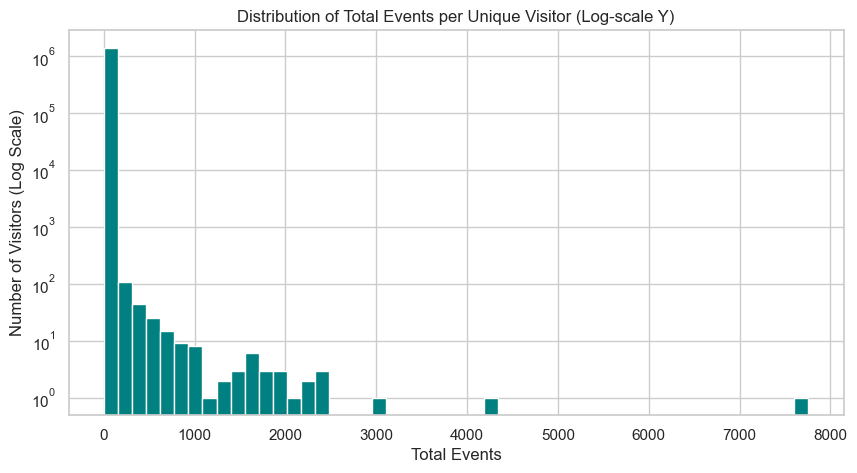

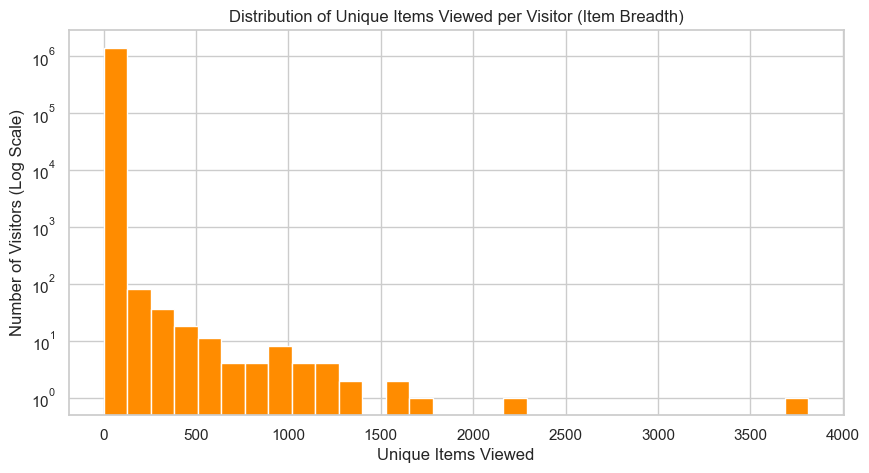


--- Summary of Engineered Features for Clustering ---

       total_events  unique_items_viewed  cart_to_view_ratio  \
count  1.407580e+06         1.407580e+06        1.407580e+06   
mean   1.957715e+00         1.524019e+00        1.351864e-02   
std    1.257981e+01         7.143724e+00        1.285278e-01   
min    1.000000e+00         1.000000e+00        0.000000e+00   
25%    1.000000e+00         1.000000e+00        0.000000e+00   
50%    1.000000e+00         1.000000e+00        0.000000e+00   
75%    2.000000e+00         1.000000e+00        0.000000e+00   
max    7.757000e+03         3.814000e+03        3.100000e+01   

       transaction_to_cart_ratio  
count               1.407580e+06  
mean                7.152855e-03  
std                 8.704915e-02  
min                 0.000000e+00  
25%                 0.000000e+00  
50%                 0.000000e+00  
75%                 0.000000e+00  
max                 1.000000e+01  


In [68]:
# User Behaviour Profiling for Clustering Features

visitor_features = df_events.groupby('visitorid').agg(
    total_events=('event', 'count'),
    total_views=('event', lambda x: (x == 'view').sum()),
    total_carts=('event', lambda x: (x == 'addtocart').sum()),
    total_transactions=('event', lambda x: (x == 'transaction').sum()),
    unique_items_viewed=('itemid', 'nunique')
)

plt.figure(figsize=(10, 5))
visitor_features['total_events'].hist(bins=50, log=True, color='teal')
plt.title('Distribution of Total Events per Unique Visitor (Log-scale Y)')
plt.xlabel('Total Events')
plt.ylabel('Number of Visitors (Log Scale)')
plt.show()

plt.figure(figsize=(10, 5))
visitor_features['unique_items_viewed'].hist(bins=30, log=True, color='darkorange')
plt.title('Distribution of Unique Items Viewed per Visitor (Item Breadth)')
plt.xlabel('Unique Items Viewed')
plt.ylabel('Number of Visitors (Log Scale)')
plt.show()

visitor_features['cart_to_view_ratio'] = np.where(
    visitor_features['total_views'] > 0,
    visitor_features['total_carts'] / visitor_features['total_views'],
    0
)

visitor_features['transaction_to_cart_ratio'] = np.where(
    visitor_features['total_carts'] > 0,
    visitor_features['total_transactions'] / visitor_features['total_carts'],
    0
)

print("\n--- Summary of Engineered Features for Clustering ---\n")
print(visitor_features[['total_events', 'unique_items_viewed', 'cart_to_view_ratio', 'transaction_to_cart_ratio']].describe())

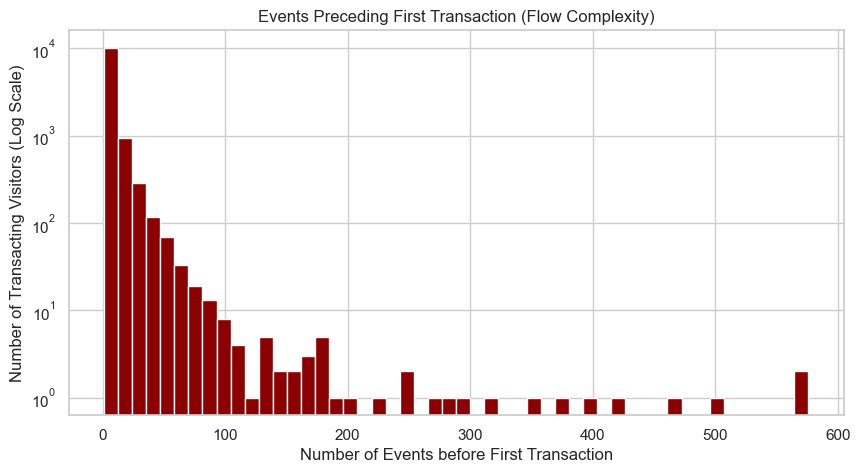


Mean events before first transaction: 8.15
Median events before first transaction: 4


In [69]:
events_sorted = df_events.sort_values(['visitorid', 'timestamp']).reset_index(drop=True)
events_sorted['event_sequence'] = events_sorted.groupby('visitorid').cumcount() + 1

first_transaction = events_sorted[events_sorted['event'] == 'transaction'].groupby('visitorid')['event_sequence'].min().reset_index()
first_transaction.rename(columns={'event_sequence': 'events_to_transact'}, inplace=True)
visitor_features = visitor_features.merge(
    first_transaction,
    on='visitorid',
    how='left'
)

transacting_users_flow = visitor_features[visitor_features['events_to_transact'].notna()]

plt.figure(figsize=(10, 5))

transacting_users_flow['events_to_transact'].hist(bins=50, log=True, color='darkred')
plt.title('Events Preceding First Transaction (Flow Complexity)')
plt.xlabel('Number of Events before First Transaction')
plt.ylabel('Number of Transacting Visitors (Log Scale)')
plt.show()

print(f"\nMean events before first transaction: {transacting_users_flow['events_to_transact'].mean():.2f}")
print(f"Median events before first transaction: {transacting_users_flow['events_to_transact'].median():.0f}")

General Observations
Event Type Distribution

We have 3 main events,
View : 2,664,312 (96.7% ),
Add to cart : 69,332 events (2.5%)
Transaction : 22,457 events (0.8%) 

WE observe that most users are likely to view items , with only 0.8% actaullly making  a transaction

Session Analysis

Total sessions: 1,761,675
Multi-event sessions: (2+ events): 382,780 (21.7% of total) - shows more than one action carried out 
Single-event sessions: 1,378,895 (78.3% of total) - most likely view only transactions


Visualization insights
The log-scale plot emphasizes that while most sessions are short (<10 minutes), there are rare but significant long-tail sessions, which could represent power users, bots, or data anomalies

Total Events per Visitor: Most users generate very few events, with engagement sharply declining as event count increases — indicating a small core of highly active users.

Unique Items Viewed per Visitor: The majority of users explore only a limited range of items, suggesting narrow browsing behavior across the platform

Skewed Distribution: Most users transact after just a few events, with the median at 4 and mean at 8.16 , indicating a long tail of users who require significantly more interactions before converting.


General Insights
. Users may be casually browsing without deep interaction, which could indicate issues like poor site navigation, irrelevant recommendations,

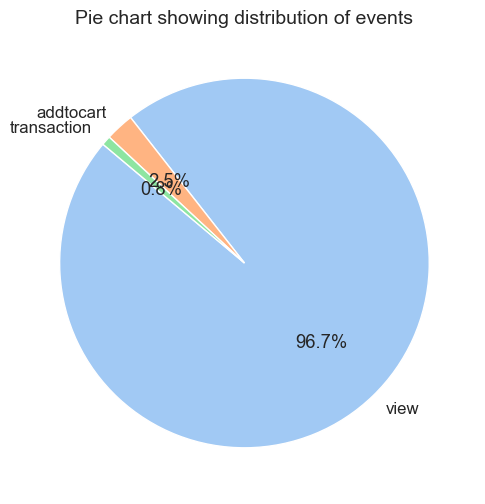

In [72]:
sns.set(style="whitegrid", font_scale=1.1, palette="pastel")

num_events = df_events['event'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(
    num_events,
    labels=num_events.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Pie chart showing distribution of events", fontsize=14)
plt.show()

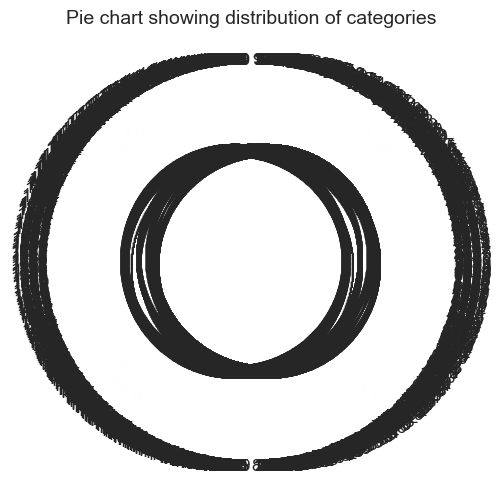

In [71]:
sns.set(style="whitegrid", font_scale=1.1, palette="pastel")

num_categories = df_categories['categoryid'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(
    num_categories,
    labels=num_categories.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Pie chart showing distribution of categories", fontsize=14)
plt.show()

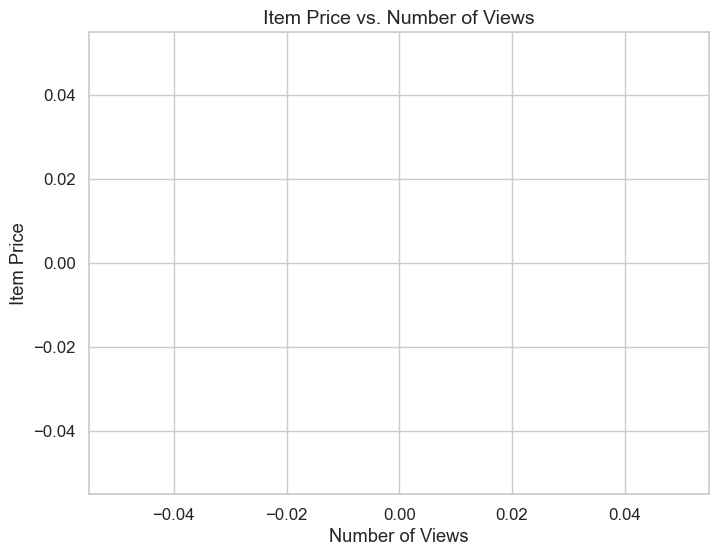

In [73]:
prices = df_properties[df_properties['property'] == 'price'][['itemid', 'value']]
prices['price'] = prices['value'].astype(float)
prices = prices.drop(columns='value')

views_per_item = (
    df_events[df_events['event'] == 'view']['itemid']
    .value_counts()
    .reset_index()
)
views_per_item.columns = ['itemid', 'view_count']

merged = pd.merge(views_per_item, prices, on='itemid', how='inner')

merged = merged[merged['price'] < merged['price'].quantile(0.99)]
merged = merged[merged['view_count'] < merged['view_count'].quantile(0.99)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='view_count', y='price', alpha=0.6, s=50)
plt.title("Item Price vs. Number of Views", fontsize=14)
plt.xlabel("Number of Views")
plt.ylabel("Item Price")
plt.show()

Insights:

Missing Values:

Only 2 of the 3 datasets contain any missing values, namely events and categories. properties is full of data, 0% of it is missing. Of the two that are missing values, events is missing 99.18519% transactionid entries, this indicates to me that that might be the "just view" transactions as those should not have transaction ids because there was no transaction to occur. This to me means we cannot clean that one as that is an important data point for us. So what we can do is pad it with 0s. categories has a missing value count of 1.497903%, this is in parentid, this can be cleaned and deleted, as this is an insignificant amount of data, to get it back to 0% missing data.

Other than this, the dataset itself is fairly comprehensive, However the properites are hashed so it is hard to decypher the quantitative data like price and such. 

The rest of the metrics for insight i am not too good with so I see Lerato's insights are a lot more helpful in that regard. as it stands all I can comment on is user behaviour, the vast majority of users just view items for sale, unless we want to see the behavious of buyers only, we cannot discount these. from the dataset, 96.7% of users viewed items, I can say it might be a good idea to say the other 3.3% did not view any items, they could have gone straight to their cart and done a transaction. this means to me that the 2.5 and 0.8% of users who added to cart and did transactions should be refactored to be included in the 96.7%. I do stand to be corrected as I might be thinking about it too much. 